## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.shape[0] - df[(df.group == "treatment") & (df.landing_page=="new_page")].group.count() - df[(df.group == "control") & (df.landing_page=="old_page")].group.count()

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


>There are no missing values as all non-null counters match the number of rows of the dataframe.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.copy() #create new dataframe
#allowed: treatmente&new_page, control&old_page

#drop the lines where treatment and old_page allign and reset the index
df2.drop(df2.index[df2[(df2.group == "treatment") & (df2.landing_page=="old_page")].group.index],inplace=True)
df2.reset_index(drop=True,inplace=True)

#drop the lines where control  and new_page allign and reset the index
df2.drop(df2.index[df2[(df2.group == "control") & (df2.landing_page=="new_page")].group.index],inplace=True)
df2.reset_index(drop=True,inplace=True)

#check if amount of dropped rows is right
df.shape[0]-3893== df2.shape[0]

True

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

In [11]:
#number of not unique user_ids
df2.shape[0]-df2.user_id.nunique()

1

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id == df2[df2.user_id.duplicated()].user_id.item()]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(df2.index[df2[df2.user_id.duplicated()].index],inplace=True)
df2.reset_index(drop=True,inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean() #probability of an individual converting regardless of the page they receive

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
dfc = df2[df2.group=="control"]
dfc.converted.mean() #probability of an individual of the control group converting 

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
dft = df2[df2.group=="treatment"]
dft.converted.mean() #probability of an individual of the treatment group converting(almost equal)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2[df2.landing_page =="new_page"].landing_page.count()/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [19]:
df2.group.value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [20]:
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

>**Answer:**
As the probability of converting is almost equal in the treatment group, in the control group and in the overall dataset, at least at this point there is not enough evidence to say that the new page leads to more conversions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>**Answer:**
>
>$H_{0}$: The old page is as good or better than the new page in leading to conversions. $p_{new}$<=$p_{old}$ or >$p_{new}$ - $p_{old}$<= 0
>
>$H_{1}$: The new pages is better than the old page in leading to conversions. $p_{new}$>$p_{old}$ or $p_{new}$ - >$p_{old}$>0
>
>p-value<=0.05 -> reject $H_{0}$
>
>p-value>0.05 -> fail to reject $H_{0}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [21]:
print("converted rate:" ,df2.converted.mean())
print("sample size old:", df2[df2.landing_page=="old_page"].landing_page.count())
print("sample size new:", df2[df2.landing_page=="new_page"].landing_page.count())
print("Perform the sampling distribution for the difference in **converted** between the two pages over **10.000** iterations of calculating an estimate from the null.")

converted rate: 0.11959708724499628
sample size old: 145274
sample size new: 145310
Perform the sampling distribution for the difference in **converted** between the two pages over **10.000** iterations of calculating an estimate from the null.


a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
df2.converted.mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$?

In [24]:
df2[df2.landing_page=="new_page"].landing_page.count()

145310

d. What is $n_{old}$?

In [25]:
df2[df2.landing_page=="old_page"].landing_page.count()

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
n_new = df2[df2.landing_page=="new_page"].landing_page.count()
p_new = df2.converted.mean()
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
n_old = df2[df2.landing_page=="old_page"].landing_page.count()
p_old = df2.converted.mean() #=p_new
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_new2 = np.array(new_page_converted).mean()
p_old2 = np.array(old_page_converted).mean()

print(p_new2, p_old2)
print("p_new2-p_old2 = ", p_new2-p_old2)

0.11937925813777442 0.12031058551426958
p_new2-p_old2 =  -0.0009313273764951641


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []
#for _ in range(10000):
#    new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])
#    old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])
#    diff = np.array(new_page_converted).mean()-np.array(old_page_converted).mean()
#    p_diffs.append(diff)

#As suggested, I replaced the for loop with an built-in function
new_page_converted = np.random.binomial(n_new,𝑝_𝑛𝑒𝑤,10000)/n_new
old_page_converted = np.random.binomial(n_old,𝑝_old,10000)/n_old
p_diffs = new_page_converted - old_page_converted 
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
#compute observed differencd
d2_obs_diff = (df2[df2.landing_page=="new_page"].converted.mean()) - (df2[df2.landing_page=="old_page"].converted.mean())
d2_obs_diff

-0.0015782389853555567

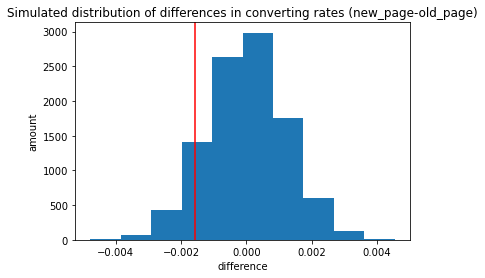

In [31]:
plt.hist(p_diffs);
plt.axvline(x=d2_obs_diff,color = 'red');
plt.xlabel('difference');
plt.ylabel('amount');
plt.title('Simulated distribution of differences in converting rates (new_page-old_page)');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
(p_diffs>d2_obs_diff).mean()

0.9079

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**Answer:**
>The computed value is called p-value, which is defined as the probability of getting our statistic or one more extreme in favour of the altertative hypothesis if our Null-hypothesis is true. 
>A large p-value like this one suggests, that we fail to reject the $H_{0}$. This means that the old page is as good or better than the new page in leading to conversions.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

#number of successes from old page
convert_old = df2[(df2.landing_page=="old_page")&(df2.converted==1)].converted.count() 

#number of successes from new page
convert_new = df2[(df2.landing_page=="new_page")&(df2.converted==1)].converted.count() 

#number of landings on old page
n_old = df2[df2.landing_page=="old_page"].landing_page.count() 

#number of landings on new page
n_new = df2[df2.landing_page=="new_page"].landing_page.count() 

#print results
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
#count = number of successes in trials -> convert_old and convert_new 
#nobs = number of trials -> n_old, n_new
#value = 0
#p1 = old page conversion rate, p2= new page conversion rate --> H1: p2> p1 pr p1<p2-> smaller

stat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new],value=0, alternative='smaller')

print('stat',stat,' pval',pval)

stat 1.3109241984234394  pval 0.9050583127590245


In [35]:
#calculate the z-Value of a one tail 95% confidence interval to get the critical value (alpha =0.05)
from scipy.stats import norm
norm.ppf(.95)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>**Answere:**
>
>p-value: 
>>The p-value computed from the proportions_ztest is almost equal to the value computed in the step j. As it is above our Type I error rate of 0.05, we fail to reject the null hypothesis. 
>
>z-score: 
>>According to Wikipedia "if the population mean and population standard deviation are known, a raw score x is converted into a standard score by z = (x - μ)/σ. 
z represents the distance between that raw score x and the population mean in units of the standard deviation. z is negative when the raw score is below the mean, positive when above."(https://en.wikipedia.org/wiki/Standard_score)
>>
>>This means it measures the distance of an observed value x from the mean value μ in units of σ. Thus a distance of 2σ is equal to a z-value of 2. 
>>
>>In this case the z-score is 1.31, being lower than the critical z-value for a one-tail 95% (alpha 0.05) confidence interval. This means, that our sample is likely to come from the null hypothesis which we thus fail to reject. 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Answer:**
>As the values are 0 or 1 we can use the logistic regression approach.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [37]:
#copy dataset
df3=df2.copy()

#add intercept column
df3['intercept']=1 

#create a dummy column for the group where 1=treatment, 0=control OR 1=new_page, 0=old_page
df3['ab_page']=pd.get_dummies(df3['group'])['treatment'] 

df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
from scipy import stats
stats.chisqprob = lambda chisq, df3: stats.chi2.sf(chisq, df3)

In [39]:
import statsmodels.api as sm
log_mod = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        16:06:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [41]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>**Answer:**
>
>In Part II we had a one tailed model, whereas in this regression model we have a two tailed test and the p-value indicates whether or not a particular explanatory variable is useful (statistically significant) for predicting the response. Specifically the p-value associated with each term in our model, is testing whether the population slope is equal to zero or not.
For the slope (ab_paged) the hypothesis are: 
>
>$H_{0}$: $p_{old}$= $p_{new}$ The parameter ab_page does not influence the model 
>
>$H_{1}$: $p_{old}$ ≠ $p_{new}$ The parameter ab_page does  influence the model
>
>
>p-value = 0 means, there is statistically significance in predicting the response  -> reject the $H_{0}$
>
>p-value ≠ 0 means, that we don't have enough evidance to reject $H_{0}$. 
>
>However, if p-value is < alpa we reject $H_{0}$.
>
>Thus, as the p-value for the ab_page is 19%, we fail to reject the $H_{0}$.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Answer:**
>Until now we've only tested, if the landing page influences the conversion rate and did not look at if other factors may have a stronger relationship. The p-value indicated, that the landing pages does not have a significant relation to the conversion rate, thus we should look for other explanatory variables. Other variables might be weekday or weekend, timestamp, gender, age, country etc. 
>
>If we analyse other variables and add them to our model, this can help in better predicting the response. On the other hand, adding other variables increases the risk of having correlated predictor variables. Also we might need to check, whether we have a linear, an interactive or some other higher order relation ship.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [43]:
# see how many different countries are represented
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [44]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [45]:
log_mod_country = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
results = log_mod_country.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 27 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        16:06:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

>Also in this case, the p-values are above the alpha treshold and thus we fail to reject the Null. The countries don't seem to have a significant relation with the results. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
df_new['CA_page']=df_new['CA']*df_new['ab_page']
df_new['UK_page']=df_new['UK']*df_new['ab_page']

In [47]:
### Fit Your Linear Model And Obtain the Results
log_mod2 = sm.Logit(df_new['converted'],df_new[['intercept','CA','UK','ab_page','CA_page','UK_page']])
results = log_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        16:06:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

>As all p-values are above 0.05 also according to this model, we fail to reject the null. 

<a id='conclusions'></a>
## Conclusions

In Part I of the project, we found that the probability of converting is almost equal in the treatment group, in the control group and in the overall dataset, which leads to the conclusion, that base on this data, there is not enough evidence to say that the new page leads to more conversions. 

In Part II we made a one-sided hypothesis test and failed to reject our Null-Hypothesis: $H_{0}$: The old page is as good or better than the new page in leading to conversions. $p_{new}$<=$p_{old}$ or >$p_{new}$ - $p_{old}$<= 0

Finally in Part III we built a regression model to find out, whether the type of page has a statistically significance in predicting the response, which we then rejected.

As all of these approaches indicate, that regarding the conversion it makes no difference wheter the a user lands on the old or on the new page, I suggest that the decision on whether to stick to the old page or to the new page must be taken depending on other parameters, e.g. the costs of the pages. 
